<a href="https://colab.research.google.com/github/Danil1D/Machine-learning/blob/main/%D0%94%D0%B0%D1%88%D0%BA%D0%B5%D0%B2%D0%B8%D1%87_%D0%BB%D0%B0%D0%B1%E2%84%968(%D0%B7%D0%B0%D0%B2%D0%B4_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trial 5 Complete [00h 01m 51s]
val_accuracy: 0.8715000152587891

Best val_accuracy So Far: 0.8845833539962769
Total elapsed time: 00h 07m 47s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8937 - loss: 0.2856 - val_accuracy: 0.8788 - val_loss: 0.3308 - learning_rate: 0.0010
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8933 - loss: 0.2877 - val_accuracy: 0.8850 - val_loss: 0.3352 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8944 - loss: 0.2791 - val_accuracy: 0.8810 - val_loss: 0.3347 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9075 - loss: 0.2496 - val_accuracy: 0.8888 - val_loss: 0.3098 - learning_rate: 2.0000e-04
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9084 - loss: 0.2430 - val_accuracy: 0.8914 - val_loss: 0.3077 - learning_rate: 2.0000e-04
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9114 - loss: 0.2385 - val_accuracy: 0.8903 - val_loss: 0.3093 - learning_rate: 2.0000e-04
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy

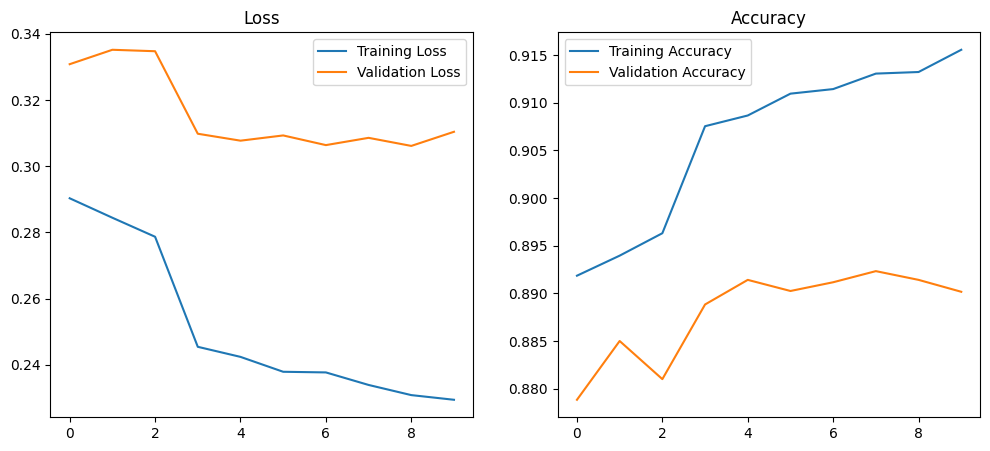

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.78      0.78      1000
           3       0.89      0.89      0.89      1000
           4       0.76      0.84      0.80      1000
           5       0.97      0.96      0.97      1000
           6       0.69      0.67      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



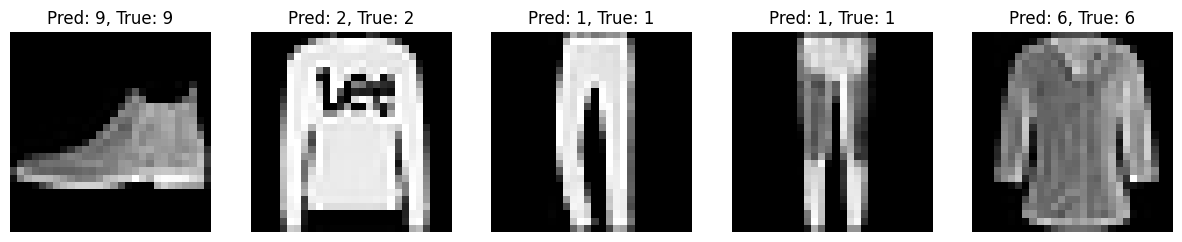

In [3]:
!pip install keras-tuner --upgrade
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import RandomSearch  # Імпорт бібліотеки keras_tuner
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

#1. Завантаження датасету
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

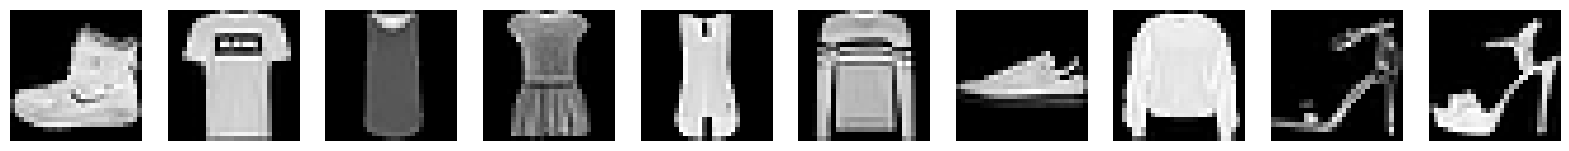

In [4]:
#2.  Виведення 10 зображень з датасету
fig, axes = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()

In [5]:
#3. Функція для створення моделі з гіперпараметрами
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=256, step=64),
                           activation='relu'))

    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='fashion_mnist_tuning'
)

Reloading Tuner from my_dir/fashion_mnist_tuning/tuner0.json


In [6]:
#4. Використання ранньої зупинки для запобігання перенавчанню
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

tuner.search(x_train, y_train, epochs=10, validation_split=0.2,
             callbacks=[early_stopping, reduce_lr])

best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
#5. Виведення архітектури найкращої моделі
best_model.summary()

history = best_model.fit(x_train, y_train, epochs=10, validation_split=0.2,
                         callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f'Test accuracy (best model): {test_acc}')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8916 - loss: 0.2944 - val_accuracy: 0.8856 - val_loss: 0.3218 - learning_rate: 0.0010
Epoch 2/10
1239/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8939 - loss: 0.2835

In [ ]:
#6 Збереження моделі на Google Drive
model.save('/content/drive/MyDrive/fashion_mnist_model.h5')

In [ ]:
#7. Графіки функції втрат і точності
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
#8. Класифікаційний звіт
y_pred = np.argmax(best_model.predict(x_test), axis=-1)
print(classification_report(y_test, y_pred))

In [ ]:
#9. Виведення прикладів з прогнозованими та справжніми класами
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].set_title(f'Pred: {y_pred[i]}, True: {y_test[i]}')
    axes[i].axis('off')
plt.show()